<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW10_zGermain/clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [0]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv")
genes  = genes.drop(genes.columns[[0]], axis = 1)

In [4]:
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [5]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,-0.030229,-0.013706,-0.023663,-0.103121,-0.088098,-0.054139,-0.002876,-0.032372,-0.016909,-0.003809,-0.042458,-0.043939,-0.023220,-0.033933,-0.038683,-0.047783,-0.023156,-0.047930,-0.017811,-0.030018,-0.020926,0.015523,0.005797,-0.071763,-0.013768,-0.020661,0.003889,-0.072878,-0.038951,-0.012304,-0.034749,-0.020242,-0.068896,-0.036699,-0.035138,-0.034969,-0.060241,-0.061428,-0.021173,-0.033599,-0.121057,-0.048510,-0.117854,-0.096178,-0.055508,-0.056013,0.007588,-0.006474,-0.027586,-0.220756,-0.020400,-0.027869,-0.008497,-0.027909,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,0.357349,0.458423,0.548218,0.589297,0.500310,0.546784,0.472823,0.395315,0.395921,0.436902,0.410235,0.445784,0.434078,0.333080,0.478327,0.492953,0.416760,0.475644,0.384636,0.386270,0.409521,0.444773,0.393139,0.624255,0.420408,0.519121,0.442212,0.429390,0.431870,0.528840,0.401199,0.459905,0.502303,0.391871,0.409209,0.443399,0.508753,0.453393,0.386390,0.424501,0.583490,0.405920,0.532086,0.564064,0.398196,0.373763,0.410327,0.432291,0.385475,0.659702,0.351325,0.344451,0.422259,0.429038,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.996649,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.817844,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.826096,-3.115594,-3.309111,-2.517066,-3.152997,-2.439324,-3.860232,-2.786184,-2.578267,-3.632931,-2.115559,-2.544261,-3.408023,-2.650749,-2.215245,-2.440473,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,-0.244387,-0.284194,-0.317263,-0.372148,-0.395844,-0.372651,-0.251957,-0.250087,-0.242332,-0.260488,-0.243780,-0.318165,-0.266188,-0.237983,-0.304092,-0.338719,-0.260898,-0.340554,-0.226021,-0.258169,-0.258578,-0.229162,-0.170977,-0.466714,-0.273969,-0.322259,-0.259066,-0.341660,-0.276331,-0.314088,-0.272306,-0.302680,-0.369546,-0.227222,-0.282149,-0.301766,-0.372967,-0.322671,-0.199928,-0.261092,-0.476621,-0.285029,-0.431509,-0.418009,-0.293508,-0.264380,-0.205578,-0.290447,-0.235940,-0.642522,-0.209206,-0.211341,-0.262162,-0.279128,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.2

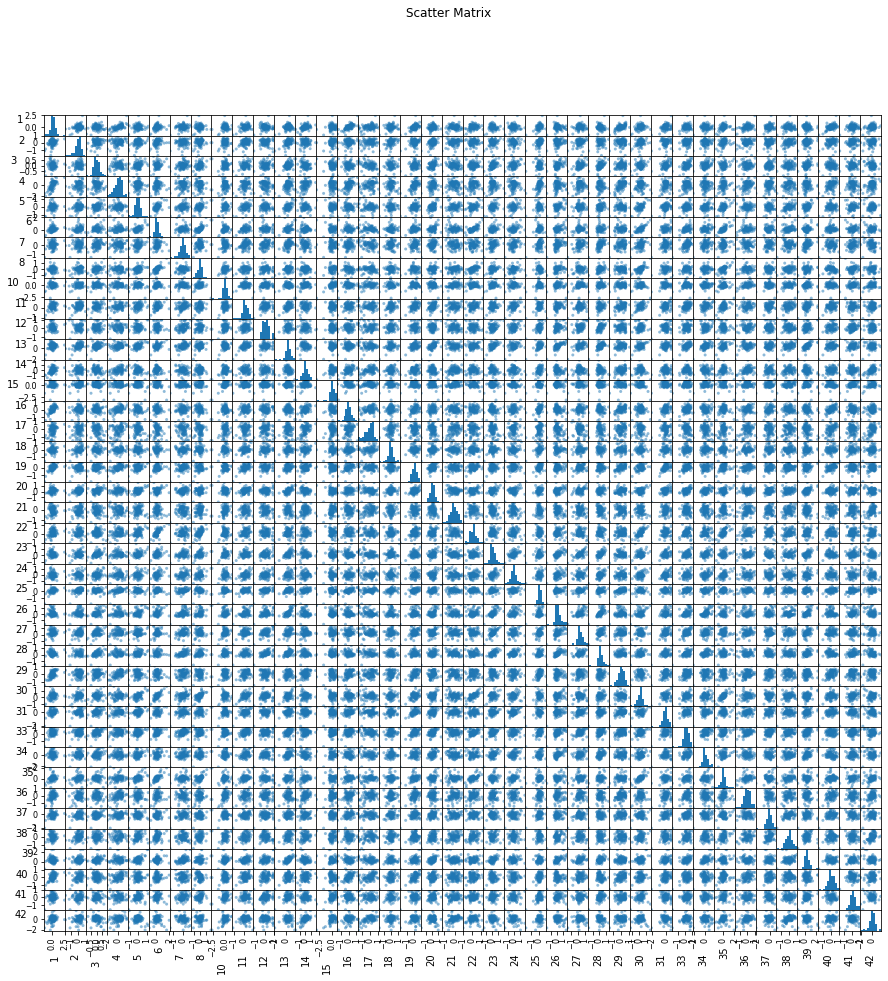

In [6]:
genesRed = genes.iloc[0:100, 0:40]
axs = pd.plotting.scatter_matrix(genesRed, figsize=(15,15));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            #to make x axis name vertical  
            axs[x, y].xaxis.label.set_rotation(90);
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0);
pl.suptitle("Scatter Matrix");

Judging by the describe function, the genes are centerered around 0. By the scatter matrix, it seems like there are no correlations within the feature space. 

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [0]:
scaledgenes = skl.preprocessing.scale(genes);

In [8]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [0]:
twodproj = skl.manifold.TSNE(random_state = 7).fit_transform(scaledgenes) 

In [10]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


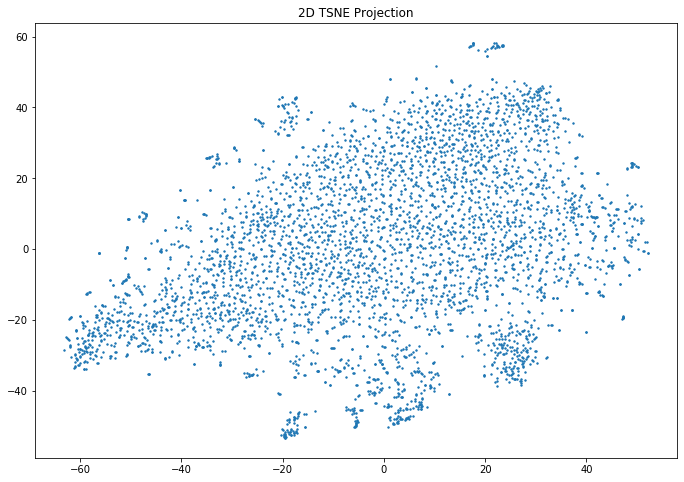

In [28]:
pl.figure(figsize = (11.5,8))
pl.scatter(twodproj[:,0], twodproj[:,1], s = 2)
pl.title("2D TSNE Projection");

The t-SNE projection allows us to visual the data easily, including identify potential clusters in out data. It is highly suggestive for several potential clusters. There are several high density groupings but it would be difficult to identify from this plot what the clusters are.

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:
def calICVar(X, labels):
  '''
  Inputs:
    X: Feature Space - Data
    labels: Column Labels?
  Output:
    icvar: The intracluster distance as the sum of the sum of 
            (x_i - x_avg)^2 for each column
  '''
  icvar = 0
  for n in np.unique(labels):
      icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
  return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

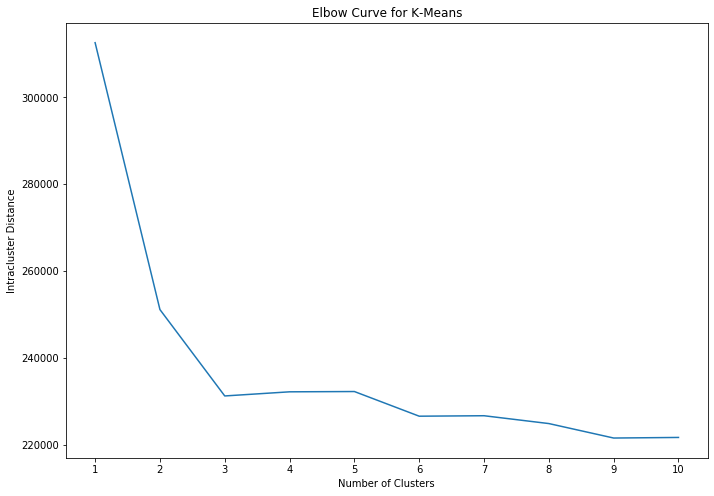

In [29]:
maxCluster = 10;
elbCurve = [];
for i in range(1, maxCluster + 1):
    tmp_kmean = cluster.k_means(scaledgenes, i)
    elbCurve.append(calICVar(scaledgenes, tmp_kmean[1]))

pl.figure(figsize = (11.5, 8))
pl.plot( range(1, maxCluster + 1), elbCurve )
pl.title("Elbow Curve for K-Means")
pl.xlabel("Number of Clusters")
pl.xticks( ticks=arange(1, maxCluster + 1, 1) )
pl.ylabel("Intracluster Distance");

This figure is an "elbow" plot to find the optimal number of clusters based on intracluster distance. Due to the drastic decrease in the distance from 1-2 and 2-3 clusters plus the increase in distance from 3-4 clusters, this is highly suggestive of 3 clusters being the optimum. 

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

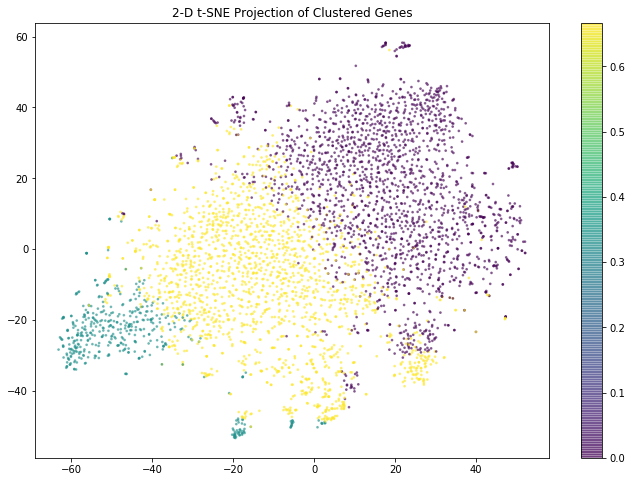

In [14]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.figure(figsize = (11.5, 8))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, 
           s = 3, alpha=0.5)
pl.colorbar()
pl.title("2-D t-SNE Projection of Clustered Genes");

This figure plots a projection of the feature space into a two-dimensional plot with the clusters color-mapped.

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

In [0]:
distMatr = sp.spatial.distance.pdist(scaledgenes)
distMatr = sp.spatial.distance.squareform(distMatr)

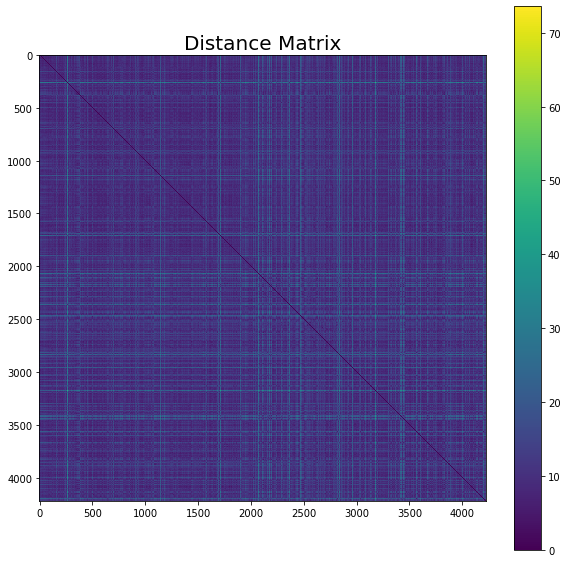

In [16]:
ax = pl.figure(figsize = (10,10))
pl.imshow(distMatr)
pl.colorbar();
pl.title("Distance Matrix", size = 20);

This is a distance matrix for the data. Blue lines that are horizontal or vertical over many points represent likely outliers of the data, as they are far from all points. Between points ~2200 and ~3000, there are a large number of points that are very distant from all other points. The first ~1800 points are similar to each other, that region has a lot of purple. There is another heavily purple region amongst the last ~1000 points. 

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

In [0]:
distMatr = sp.spatial.distance.pdist(scaledgenes)
#Add mean

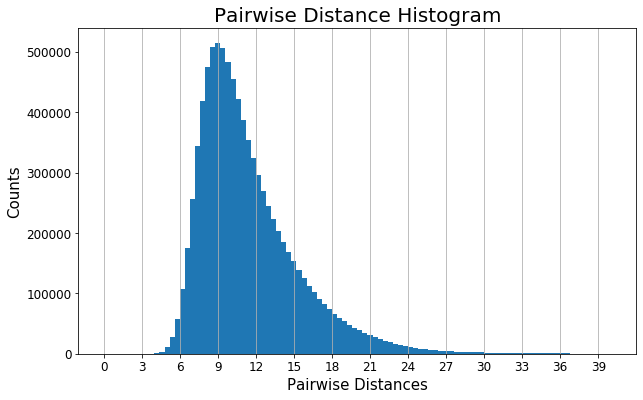

In [18]:
ax = pl.figure(figsize = (10,6))
pl.hist(distMatr, bins = 100, range  = (0, 40))
pl.title("Pairwise Distance Histogram", size = 20)
pl.xlabel("Pairwise Distances", size = 15)
pl.ylabel("Counts", size = 15)
pl.xticks(ticks = arange(0, 40, 3), size = 12)
pl.yticks(size = 12)
pl.grid(axis = 'x');

This is a histogram of the pairwise distances. It is only plotted for a range of [0,40] as anything below is too small to affect the location of the mean. This plot resembles a $\chi^2$ and the mean is slightly greater than the peak at 9.

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [0]:
geneClusterDB = cluster.DBSCAN(eps = 9).fit(scaledgenes)

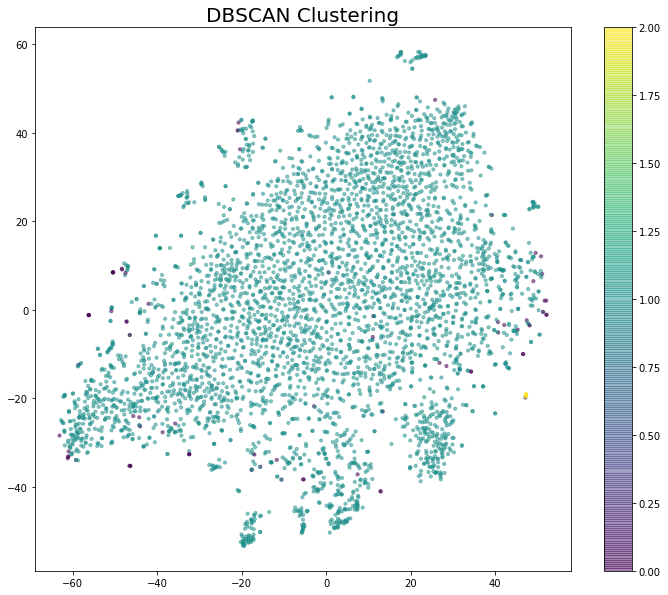

In [20]:
ax = pl.figure(figsize = (12,10))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneClusterDB.labels_ + 1,
           s = 10, alpha = 0.5)
pl.title("DBSCAN Clustering", size = 20)
pl.colorbar();

This figure contains the 2-D t-SNE projection of the clustering gained from the DBSCAN method. This seems to be a poor representation of the data or at least one that isn't useful for identifying clusters within the data. It puts nearly all of the data into a single cluster, though there is a second one, it contains very few data points. Though it does identify several outliers. 

In [21]:
set(geneClusterDB.labels_)

{-1, 0, 1}

In [22]:
len(geneClusterDB.labels_[geneClusterDB.labels_ == -1])

76

There are two clusters, and 76 outliers. The number of outliers does not seem signigicant as it amounts to a tiny fraction of the total number of points. 

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [0]:
genesClusterAG = cluster.AgglomerativeClustering().fit(scaledgenes)

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

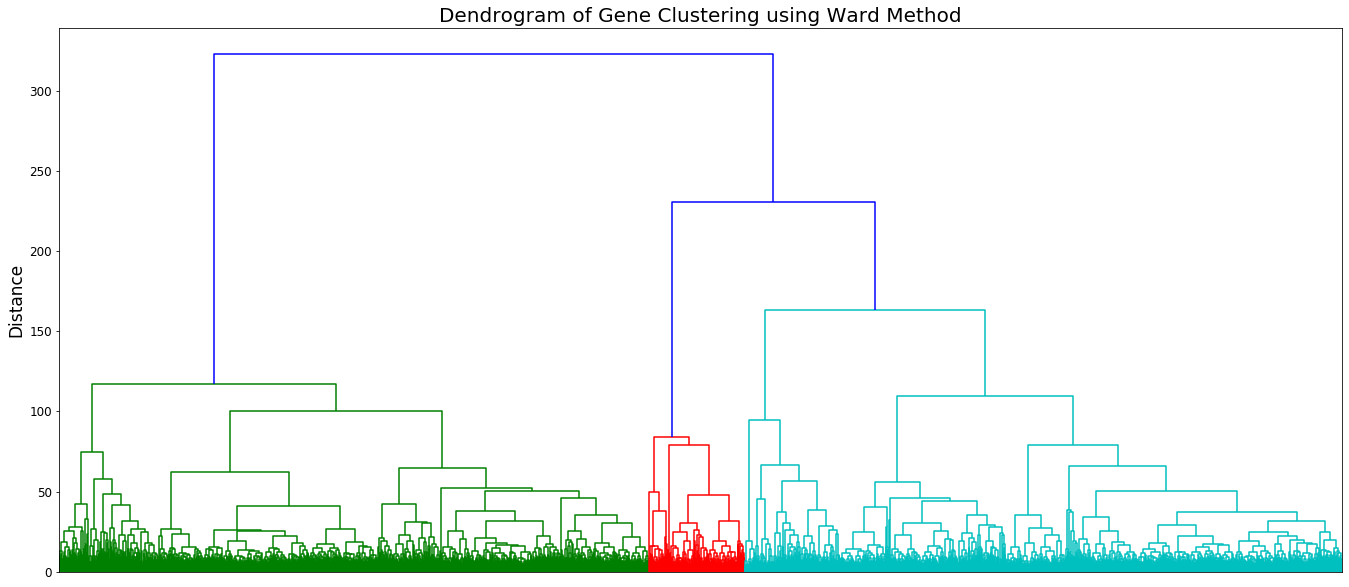

In [25]:
geneLinkage = linkage(sp.spatial.distance.pdist(scaledgenes), method = "ward")
pl.figure(figsize = [23,10])
pl.title("Dendrogram of Gene Clustering using Ward Method", size = 20)
pl.ylabel("Distance", size = 17)
pl.yticks(size = 12)
dendrogram(geneLinkage, no_labels = True);

The dendrogram containing a clustering based on the ward linkage. The length of each leg is the distance between a child and parent cluster. 

4b.3 repeat with a different linkage and comment on differences

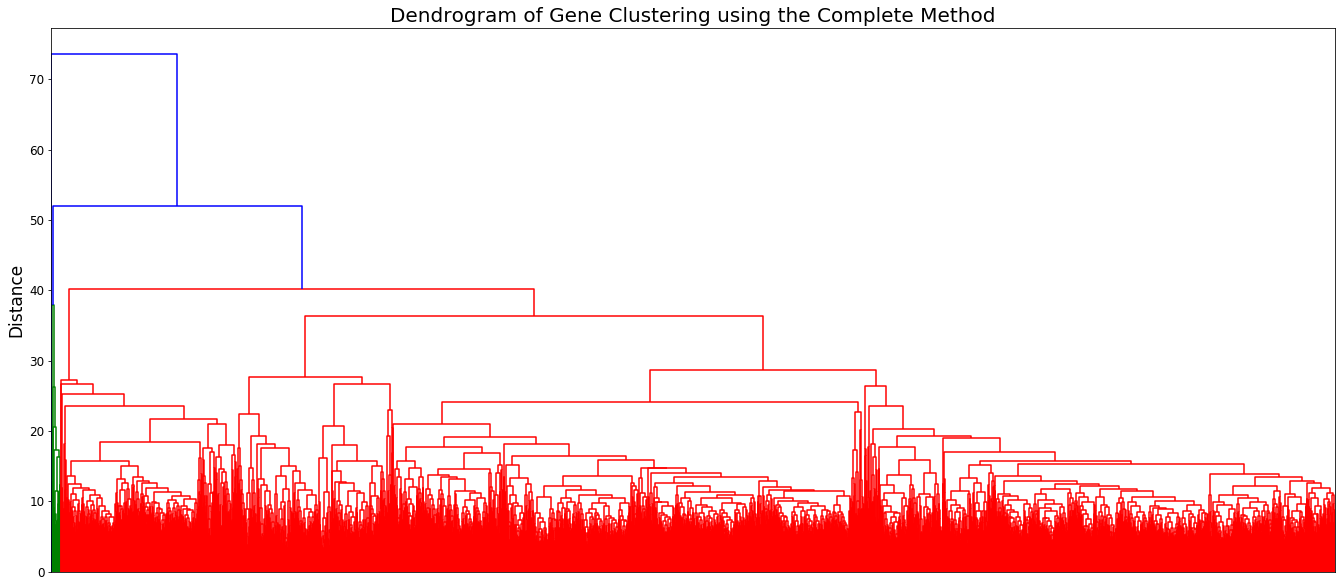

In [26]:
geneLinkage = linkage(sp.spatial.distance.pdist(scaledgenes), method = "complete")
pl.figure(figsize = [23,10])
pl.title("Dendrogram of Gene Clustering using the Complete Method", size = 20)
pl.ylabel("Distance", size = 17)
pl.yticks(size = 12)
dendrogram(geneLinkage, no_labels = True);


The dendrogram here, contains the gene clustering based on ward linkage. The length of each leg is the distance between a child and parent cluster.

There are many differences in the results of the 2 clustering methods. The ward linkage method consisted of 3 clusters while the complete method consists of only two families and one consists of nearly all the points. With the complete method, the distances are also smaller than with the ward linkage. It also seems that with the ward linkage, the points are clustered into small clusters at a shorter distance relative to the maximum than does the points with the complete linkage. This can be seen as the early clustering is more dense horizontally and the dense region takes up a greater portion of the visual than it does in the ward linkage. 

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

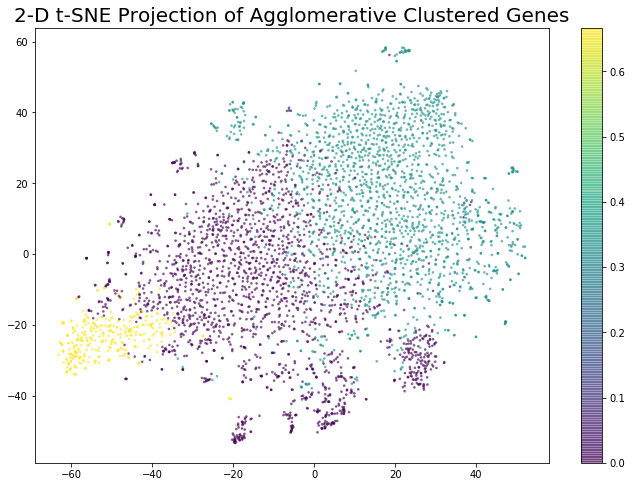

In [30]:
geneclustersAg = cluster.AgglomerativeClustering(n_clusters = 3).fit(scaledgenes)
pl.figure(figsize = (11.5, 8))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_/ geneclustersAg.n_clusters, 
           s = 3, alpha=0.5)
pl.colorbar()
pl.title("2-D t-SNE Projection of Agglomerative Clustered Genes", size = 20);

The 2-D t-SNE projection of the resulting agglomerative clustering of the genes. It is in three clusters. The results of this and the K-Means clustering are very similar. Some differences are in the cluster at the lower left, it is smaller in the Agglomerative clustering than with K-Means; but the other two clusters are of only slightly different sizes with many difference in the boundaries of the two clusters.

In [79]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative


In [0]:
#Done above